In [39]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier , GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold , cross_validate, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score ,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder ,MinMaxScaler ,StandardScaler ,RobustScaler
from sklearn.feature_selection import f_classif
import os

import pandas as pd
import numpy as np #ß

import seaborn as sns
import matplotlib.pyplot as plt





I need python version 3.9.17 in order to run 
import pymssql

In [2]:
# from Preprocessing_Application import DataPreprocessor

# server = 'reporting-db.nystartfinans.net'
# database = 'reporting-db'
# username = 'Andreas'
# password = 'nCq8Sg@1lYnd(E'

# path = "/Users/andreasnilsson/Desktop/Repository Homes/data-behaviour-scorecard/1. Data/1. BSD copy.sql"

# preprocessor = DataPreprocessor(server, database, username, password) ss 


# df = preprocessor.fetch_data_from_sql(path)


In [3]:
#df.to_csv('BSC_raw.csv', index=False)

In [44]:


# # Read the CSV file.
df = pd.read_csv('BSC_raw.csv', skiprows=0)

In [77]:
pd.set_option('display.max_columns', None)

df = df.sort_values(by=['AccountNumber','MOB'])
df =df[df.DisbursedDate >= '2019-01-01' ]

df =df[df.MOB < 20]

In [78]:
df

,SnapshotDate,IsMonthEnd,AccountNumber,AccountStatus,CurrentAmount,MOB,DisbursedDate,RemainingTenor,CoappFlag,Kronofogden,NoKronofogden,SSN,CurrentDelinquencyStatus,FBE,TimeSince30,TimeSince60,TimeSince90,TimeSince120,Ever30In6Months,Ever30In12Months,Ever30,Ever60In6Months,Ever60In12Months,Ever60,Ever90In6Months,Ever90In12Months,Ever90,Ever120In6Months,Ever120In12Months,Ever120,WorstDelinquency6M,WorstDelinquency12M,WorstDelinquency,TimeSinceFBE,EverFBEIn6Months,EverFBEIn12Months,EverFBEIn24Months,EverFBEIn36Months,EverFBEIn48Months,EverFBE,Ever30After12Months,Ever60After12Months,Ever90After12Months,Ever120After12Months,FrozenAfter12Months,Ever30After24Months,Ever60After24Months,Ever90After24Months,Ever120After24Months,FrozenAfter24Months,Ever30After36Months,Ever60After36Months,Ever90After36Months,Ever120After36Months,FrozenAfter36Months,Ever30After48Months,Ever60After48Months,Ever90After48Months,FrozenAfter48Months,TimeToFirst30,TimeToFirst60,TimeToFirst90,TimeToFirst120,TimeToFirstFrozen,ExposureAtFirst30,ExposureAtFirst60,ExposureAtFirst90,ExposureAtFirst120,ExposureAtFirstFrozen,Score,RiskClass
133776,2019-04-30,1,5190129,OPEN,359229.90,0,2019-04-10,143,1,0,1,DE59EBE1D0C61CF9C5BCF9ECA3C7CF513EDD3CA8443486...,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.169574,N3
583370,2019-04-30,1,5190129,OPEN,359229.90,0,2019-04-10,143,0,0,1,C664481CEEB750936ED90A95F5ACFF8BB2BD474C5B3909...,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.169574,N3
118496,2019-05-31,1,5190129,OPEN,358551.79,1,2019-04-10,142,1,0,1,DE59EBE1D0C61CF9C5BCF9ECA3C7CF513EDD3CA8443486...,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.169574,N3
562047,2019-05-31,1,5190129,OPEN,358551.79,1,2019-04-10,142,0,0,1,C664481CEEB750936ED90A95F5ACFF8BB2BD474C5B3909...,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.169574,N3
128376,2019-06-30,1,5190129,OPEN,357863.00,2,2019-04-10,141,1,0,1,DE59EBE1D0C61CF9C5BCF9ECA3C7CF513EDD3CA8443486...,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.169574,N3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471596,2023-10-31,1,7973571,OPEN,320000.00,0,2023-10-31,180,0,0,1,107F1DB739AF730AC3C021B21E0409A5F5746FE7CB112F...,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,-1,-1,-1,0,-1,-1,-1,-1,0,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.622251,N1
505194,2023-10-31,1,7973571,OPEN,320000.00,0,2023-10-31,180,1,0,1,FA1C9B5B38229890D27425D0F1D9BA1776D02F7589A5A1...,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,-1,-1,-1,0,-1,-1,-1,-1,0,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.622251,N1
96700,2023-10-31,1,7973704,OPEN,317000.00,0,2023-10-31,180,1,0,1,05664202697E02A24080A9F6C90529A9C7FA126FBD935C...,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,-1,-1,-1,0,-1,-1,-1,-1,0,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.945136,N1
162041,2023-10-31,1,7973704,OPEN,317000.00,0,2023-10-31,180,0,0,1,7D08B548EF0636488BCE667D4DC386486BA5D0ABFE3B34...,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,-1,-1,-1,0,-1,-1,-1,-1,0,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.945136,N1


In [79]:
df[df.AccountNumber == 5000179].tail(60)  ## main deliqent 7123433 

,SnapshotDate,IsMonthEnd,AccountNumber,AccountStatus,CurrentAmount,MOB,DisbursedDate,RemainingTenor,CoappFlag,Kronofogden,NoKronofogden,SSN,CurrentDelinquencyStatus,FBE,TimeSince30,TimeSince60,TimeSince90,TimeSince120,Ever30In6Months,Ever30In12Months,Ever30,Ever60In6Months,Ever60In12Months,Ever60,Ever90In6Months,Ever90In12Months,Ever90,Ever120In6Months,Ever120In12Months,Ever120,WorstDelinquency6M,WorstDelinquency12M,WorstDelinquency,TimeSinceFBE,EverFBEIn6Months,EverFBEIn12Months,EverFBEIn24Months,EverFBEIn36Months,EverFBEIn48Months,EverFBE,Ever30After12Months,Ever60After12Months,Ever90After12Months,Ever120After12Months,FrozenAfter12Months,Ever30After24Months,Ever60After24Months,Ever90After24Months,Ever120After24Months,FrozenAfter24Months,Ever30After36Months,Ever60After36Months,Ever90After36Months,Ever120After36Months,FrozenAfter36Months,Ever30After48Months,Ever60After48Months,Ever90After48Months,FrozenAfter48Months,TimeToFirst30,TimeToFirst60,TimeToFirst90,TimeToFirst120,TimeToFirstFrozen,ExposureAtFirst30,ExposureAtFirst60,ExposureAtFirst90,ExposureAtFirst120,ExposureAtFirstFrozen,Score,RiskClass


## Filter away Main Applicant if we have CO

In [80]:
COCO_acn = df[df.CoappFlag== 1].AccountNumber.drop_duplicates() 

COCO_acn

133776    5190129
373359    5260732
187513    5348610
466037    5405949
564993    5434188
           ...   
394174    7972185
94347     7972367
632364    7972516
505194    7973571
96700     7973704
Name: AccountNumber, Length: 3302, dtype: int64

In [81]:
allCOCO = df[df.AccountNumber.isin(COCO_acn)]
onlyMAIN = df[~df['AccountNumber'].isin(COCO_acn)]


In [82]:
onlyCOCO = allCOCO[allCOCO.CoappFlag == 1].copy()

In [83]:
onlyCOCO[onlyCOCO.Ever90 == 1]

,SnapshotDate,IsMonthEnd,AccountNumber,AccountStatus,CurrentAmount,MOB,DisbursedDate,RemainingTenor,CoappFlag,Kronofogden,NoKronofogden,SSN,CurrentDelinquencyStatus,FBE,TimeSince30,TimeSince60,TimeSince90,TimeSince120,Ever30In6Months,Ever30In12Months,Ever30,Ever60In6Months,Ever60In12Months,Ever60,Ever90In6Months,Ever90In12Months,Ever90,Ever120In6Months,Ever120In12Months,Ever120,WorstDelinquency6M,WorstDelinquency12M,WorstDelinquency,TimeSinceFBE,EverFBEIn6Months,EverFBEIn12Months,EverFBEIn24Months,EverFBEIn36Months,EverFBEIn48Months,EverFBE,Ever30After12Months,Ever60After12Months,Ever90After12Months,Ever120After12Months,FrozenAfter12Months,Ever30After24Months,Ever60After24Months,Ever90After24Months,Ever120After24Months,FrozenAfter24Months,Ever30After36Months,Ever60After36Months,Ever90After36Months,Ever120After36Months,FrozenAfter36Months,Ever30After48Months,Ever60After48Months,Ever90After48Months,FrozenAfter48Months,TimeToFirst30,TimeToFirst60,TimeToFirst90,TimeToFirst120,TimeToFirstFrozen,ExposureAtFirst30,ExposureAtFirst60,ExposureAtFirst90,ExposureAtFirst120,ExposureAtFirstFrozen,Score,RiskClass
535870,2020-11-30,1,5534920,OPEN,305885.95,19,2019-04-03,160,1,0,1,9A269B465DD6B50AA552EEF9D6B8668044C42E8BF06035...,4,0,37.0,6.0,0.0,NaN,1,1,1,1,1,1,1,1,1,0,0,0,4,4,4,NaN,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,20.0,20.0,20.0,20.0,20.0,305885.95,305885.95,305885.95,305885.95,305885.95,100.0,E8
223194,2020-08-31,1,5547013,OPEN,180560.53,19,2019-01-29,101,1,0,1,2C89CBBEFF7EDC2E9CFDB87AB27809DC24B83F64AF503A...,3,0,38.0,0.0,5.0,NaN,1,1,1,1,1,1,1,1,1,0,0,0,4,4,4,NaN,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1,-1,-1,-1,20.0,20.0,20.0,23.0,23.0,180560.53,180560.53,180560.53,179294.36,179294.36,64.5,E7
36426,2020-08-31,1,5550413,OPEN,115000.31,18,2019-02-14,102,1,0,1,9C8D8C7EEE403770040216F94CD0FC7C069B5AB7AC6AD3...,4,0,38.0,7.0,0.0,NaN,1,1,1,1,1,1,1,1,1,0,0,0,4,4,4,NaN,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1,-1,-1,-1,19.0,19.0,19.0,19.0,21.0,115000.31,115000.31,115000.31,115000.31,114118.57,100.0,E8
47056,2020-09-30,1,5550413,OPEN,115000.31,19,2019-02-14,101,1,0,1,9C8D8C7EEE403770040216F94CD0FC7C069B5AB7AC6AD3...,4,0,68.0,37.0,6.0,0.0,1,1,1,1,1,1,1,1,1,1,1,1,5,5,5,NaN,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1,-1,-1,-1,20.0,20.0,20.0,20.0,21.0,115000.31,115000.31,115000.31,115000.31,114118.57,100.0,E8
358933,2020-01-31,1,5574694,OPEN,350819.86,11,2019-02-06,132,1,0,1,7D841126206A97AAC02497867AB0998FD9DEA3046CE7D6...,4,0,38.0,7.0,0.0,NaN,1,1,1,1,1,1,1,1,1,0,0,0,4,4,4,NaN,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1,-1,-1,-1,12.0,12.0,12.0,12.0,12.0,350819.86,350819.86,350819.86,350819.86,350819.86,100.0,E8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405958,2023-10-31,1,7894934,FROZEN,112945.81,7,2023-03-31,113,1,0,1,A7C9B1A2E62CDBB14E1E1CA19DCD25F41A7103AA40F088...,9,0,NaN,NaN,NaN,NaN,1,1,1,1,1,1,1,1,1,1,1,1,5,5,5,NaN,0,0,0,0,0,0,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,8.0,8.0,8.0,8.0,8.0,112945.81,112945.81,112945.81,112945.81,112945.81,100.0,E8
434516,2023-10-31,1,7895386,OPEN,499057.52,6,2023-04-20,174,1,0,1,E67B7E226F4EFEC34933FDB0F720EDACD2BC78795C06F9...,4,0,36.0,6.0,0.0,NaN,1,1,1,1,1,1,1,1,1,0,0,0,4,4,4,NaN,0,0,0,0,0,0,-1,-1,-1,0,-1,-1,-1,-1,0,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,7.0,7.0,7.0,NaN,NaN,499057.52,499057.52,499057.52,NaN,NaN,100.0,E8
278619,2023-08-31,1,7905631,OPEN,299055.00,3,2023-05-02,140,1,0,1,B30D292DC0B2A5A2835B5DFE0384D54E35B31D3CA751BA...,4,0,37.0,6.0,0.0,NaN,1,1,1,1,1,1,1,1,1,0,0,0,4,4,4,NaN,0,0,0,0,0,0,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,4.0,4.0,4.0,4.0,5.0,299055.00,299055.00,299055.00,299055.00,299055.00,100.0,E8
275393,2023-09-30,1,7905631,OPEN,299055.00,4,2023-05-02,139,1,0,1,B30D292DC0B2A5A2835B5DFE0384D54E35B31D3CA

In [84]:
onlyCOCO[onlyCOCO.AccountNumber == 5000179].tail(60) 

,SnapshotDate,IsMonthEnd,AccountNumber,AccountStatus,CurrentAmount,MOB,DisbursedDate,RemainingTenor,CoappFlag,Kronofogden,NoKronofogden,SSN,CurrentDelinquencyStatus,FBE,TimeSince30,TimeSince60,TimeSince90,TimeSince120,Ever30In6Months,Ever30In12Months,Ever30,Ever60In6Months,Ever60In12Months,Ever60,Ever90In6Months,Ever90In12Months,Ever90,Ever120In6Months,Ever120In12Months,Ever120,WorstDelinquency6M,WorstDelinquency12M,WorstDelinquency,TimeSinceFBE,EverFBEIn6Months,EverFBEIn12Months,EverFBEIn24Months,EverFBEIn36Months,EverFBEIn48Months,EverFBE,Ever30After12Months,Ever60After12Months,Ever90After12Months,Ever120After12Months,FrozenAfter12Months,Ever30After24Months,Ever60After24Months,Ever90After24Months,Ever120After24Months,FrozenAfter24Months,Ever30After36Months,Ever60After36Months,Ever90After36Months,Ever120After36Months,FrozenAfter36Months,Ever30After48Months,Ever60After48Months,Ever90After48Months,FrozenAfter48Months,TimeToFirst30,TimeToFirst60,TimeToFirst90,TimeToFirst120,TimeToFirstFrozen,ExposureAtFirst30,ExposureAtFirst60,ExposureAtFirst90,ExposureAtFirst120,ExposureAtFirstFrozen,Score,RiskClass


In [85]:
onlyCOCO

,SnapshotDate,IsMonthEnd,AccountNumber,AccountStatus,CurrentAmount,MOB,DisbursedDate,RemainingTenor,CoappFlag,Kronofogden,NoKronofogden,SSN,CurrentDelinquencyStatus,FBE,TimeSince30,TimeSince60,TimeSince90,TimeSince120,Ever30In6Months,Ever30In12Months,Ever30,Ever60In6Months,Ever60In12Months,Ever60,Ever90In6Months,Ever90In12Months,Ever90,Ever120In6Months,Ever120In12Months,Ever120,WorstDelinquency6M,WorstDelinquency12M,WorstDelinquency,TimeSinceFBE,EverFBEIn6Months,EverFBEIn12Months,EverFBEIn24Months,EverFBEIn36Months,EverFBEIn48Months,EverFBE,Ever30After12Months,Ever60After12Months,Ever90After12Months,Ever120After12Months,FrozenAfter12Months,Ever30After24Months,Ever60After24Months,Ever90After24Months,Ever120After24Months,FrozenAfter24Months,Ever30After36Months,Ever60After36Months,Ever90After36Months,Ever120After36Months,FrozenAfter36Months,Ever30After48Months,Ever60After48Months,Ever90After48Months,FrozenAfter48Months,TimeToFirst30,TimeToFirst60,TimeToFirst90,TimeToFirst120,TimeToFirstFrozen,ExposureAtFirst30,ExposureAtFirst60,ExposureAtFirst90,ExposureAtFirst120,ExposureAtFirstFrozen,Score,RiskClass
133776,2019-04-30,1,5190129,OPEN,359229.90,0,2019-04-10,143,1,0,1,DE59EBE1D0C61CF9C5BCF9ECA3C7CF513EDD3CA8443486...,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.169574,N3
118496,2019-05-31,1,5190129,OPEN,358551.79,1,2019-04-10,142,1,0,1,DE59EBE1D0C61CF9C5BCF9ECA3C7CF513EDD3CA8443486...,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.169574,N3
128376,2019-06-30,1,5190129,OPEN,357863.00,2,2019-04-10,141,1,0,1,DE59EBE1D0C61CF9C5BCF9ECA3C7CF513EDD3CA8443486...,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.169574,N3
130902,2019-07-31,1,5190129,OPEN,357163.36,3,2019-04-10,140,1,0,1,DE59EBE1D0C61CF9C5BCF9ECA3C7CF513EDD3CA8443486...,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.877308,E3
122451,2019-08-31,1,5190129,OPEN,356452.70,4,2019-04-10,139,1,0,1,DE59EBE1D0C61CF9C5BCF9ECA3C7CF513EDD3CA8443486...,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.877308,E3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394174,2023-10-31,1,7972185,OPEN,177710.91,0,2023-10-27,120,1,0,1,B949CCBDE9665B0FDB16A79F034DE9BAAC20767F8BA47A...,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,-1,-1,-1,0,-1,-1,-1,-1,0,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.622251,N1
94347,2023-10-31,1,7972367,OPEN,107825.00,0,2023-10-30,180,1,0,1,1DC2A3E0FADB269DA8EB52EC7233ABCAB6781DB8C09E1E...,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,-1,-1,-1,0,-1,-1,-1,-1,0,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.880232,N2
632364,2023-10-31,1,7972516,OPEN,497954.29,0,2023-10-30,180,1,0,1,A553A8745D5E58C097A9038F48E0B8360ACE0ACF89D5E9...,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,-1,-1,-1,0,-1,-1,-1,-1,0,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.622251,N1
505194,2023-10-31,1,7973571,OPEN,320000.00,0,2023-10-31,180,1,0,1,FA1C9B5B38229890D27425D0F1D9BA1776D02F7589A5A1...,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,-1,-1,-1,0,-1,-1,-1,-1,0,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.622251,N1


In [86]:
onlyMAIN

,SnapshotDate,IsMonthEnd,AccountNumber,AccountStatus,CurrentAmount,MOB,DisbursedDate,RemainingTenor,CoappFlag,Kronofogden,NoKronofogden,SSN,CurrentDelinquencyStatus,FBE,TimeSince30,TimeSince60,TimeSince90,TimeSince120,Ever30In6Months,Ever30In12Months,Ever30,Ever60In6Months,Ever60In12Months,Ever60,Ever90In6Months,Ever90In12Months,Ever90,Ever120In6Months,Ever120In12Months,Ever120,WorstDelinquency6M,WorstDelinquency12M,WorstDelinquency,TimeSinceFBE,EverFBEIn6Months,EverFBEIn12Months,EverFBEIn24Months,EverFBEIn36Months,EverFBEIn48Months,EverFBE,Ever30After12Months,Ever60After12Months,Ever90After12Months,Ever120After12Months,FrozenAfter12Months,Ever30After24Months,Ever60After24Months,Ever90After24Months,Ever120After24Months,FrozenAfter24Months,Ever30After36Months,Ever60After36Months,Ever90After36Months,Ever120After36Months,FrozenAfter36Months,Ever30After48Months,Ever60After48Months,Ever90After48Months,FrozenAfter48Months,TimeToFirst30,TimeToFirst60,TimeToFirst90,TimeToFirst120,TimeToFirstFrozen,ExposureAtFirst30,ExposureAtFirst60,ExposureAtFirst90,ExposureAtFirst120,ExposureAtFirstFrozen,Score,RiskClass
191373,2019-01-31,1,5250584,OPEN,166027.42,0,2019-01-30,84,0,0,1,7B9A9543C23E63A1948391EEBBE7071A9C296E21EDCF06...,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.217380,N2
187232,2019-02-28,1,5250584,OPEN,165051.99,1,2019-01-30,83,0,0,1,7B9A9543C23E63A1948391EEBBE7071A9C296E21EDCF06...,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.217380,N2
200200,2019-03-31,1,5250584,OPEN,163991.73,2,2019-01-30,82,0,0,1,7B9A9543C23E63A1948391EEBBE7071A9C296E21EDCF06...,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.217380,N2
188762,2019-04-30,1,5250584,OPEN,162916.54,3,2019-01-30,81,0,0,1,7B9A9543C23E63A1948391EEBBE7071A9C296E21EDCF06...,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.654435,E4
194817,2019-05-31,1,5250584,OPEN,161826.21,4,2019-01-30,80,0,0,1,7B9A9543C23E63A1948391EEBBE7071A9C296E21EDCF06...,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.595843,E4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93554,2023-10-31,1,7972490,OPEN,125000.00,0,2023-10-31,144,0,0,1,9486D12E9FDAEF4C69270406140AF3798A1AA79EF4DB80...,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,-1,-1,-1,0,-1,-1,-1,-1,0,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.272936,N2
444085,2023-10-31,1,7972573,OPEN,110000.00,0,2023-10-31,96,0,0,1,16B8DE5C3C186C6D534370B1D2448905D1EEA154F51AD1...,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,-1,-1,-1,0,-1,-1,-1,-1,0,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.150730,N1
596869,2023-10-31,1,7972672,OPEN,62979.71,0,2023-10-30,60,0,0,1,8E1643BFC40F8C41FE552140509DEEE937762117541BEB...,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,-1,-1,-1,0,-1,-1,-1,-1,0,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.790690,N1
110267,2023-10-31,1,7972862,OPEN,162612.00,0,2023-10-30,144,0,0,1,CADE2F20CB52E7C89C803F0952AF324B5A27672D46114F...,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,-1,-1,-1,0,-1,-1,-1,-1,0,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.054894,N2


In [87]:
cleanAccounts = pd.concat((onlyMAIN,onlyCOCO))

## Add NEW SCORE

In [88]:
# # Read the CSV file.
AccountScore = pd.read_csv('NewScoreTape.csv', skiprows=0)
AccountScore =  AccountScore[['AccountNumber','P_calibrated']].drop_duplicates()

In [89]:
AccountScore

,AccountNumber,P_calibrated
0,5020169,0.052000
1,5027321,0.096607
2,5027669,0.028300
3,5028501,0.028470
4,5043005,0.152784
...,...,...
12646,7982291,0.080156
12647,7982648,0.027150
12648,7982663,0.061858
12649,7983364,0.126410


In [90]:
withScore =  pd.merge(cleanAccounts,AccountScore , on= 'AccountNumber')

In [91]:
withScore[withScore.Ever90 == 1]

,SnapshotDate,IsMonthEnd,AccountNumber,AccountStatus,CurrentAmount,MOB,DisbursedDate,RemainingTenor,CoappFlag,Kronofogden,NoKronofogden,SSN,CurrentDelinquencyStatus,FBE,TimeSince30,TimeSince60,TimeSince90,TimeSince120,Ever30In6Months,Ever30In12Months,Ever30,Ever60In6Months,Ever60In12Months,Ever60,Ever90In6Months,Ever90In12Months,Ever90,Ever120In6Months,Ever120In12Months,Ever120,WorstDelinquency6M,WorstDelinquency12M,WorstDelinquency,TimeSinceFBE,EverFBEIn6Months,EverFBEIn12Months,EverFBEIn24Months,EverFBEIn36Months,EverFBEIn48Months,EverFBE,Ever30After12Months,Ever60After12Months,Ever90After12Months,Ever120After12Months,FrozenAfter12Months,Ever30After24Months,Ever60After24Months,Ever90After24Months,Ever120After24Months,FrozenAfter24Months,Ever30After36Months,Ever60After36Months,Ever90After36Months,Ever120After36Months,FrozenAfter36Months,Ever30After48Months,Ever60After48Months,Ever90After48Months,FrozenAfter48Months,TimeToFirst30,TimeToFirst60,TimeToFirst90,TimeToFirst120,TimeToFirstFrozen,ExposureAtFirst30,ExposureAtFirst60,ExposureAtFirst90,ExposureAtFirst120,ExposureAtFirstFrozen,Score,RiskClass,P_calibrated
130,2019-11-30,1,5513502,OPEN,43987.14,10,2019-01-02,71,0,0,1,406FFFA0D93A42D591F7D0342911AEA9E6CF7EFC432B8E...,4,0,37.0,6.0,0.0,NaN,1,1,1,1,1,1,1,1,1,0,0,0,4,4,4,NaN,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1,-1,-1,-1,11.0,11.0,11.0,16.0,20.0,43987.14,43987.14,43987.14,41222.88,39811.27,100.0,E8,0.200493
131,2019-12-31,1,5513502,OPEN,42974.94,11,2019-01-02,70,0,0,1,406FFFA0D93A42D591F7D0342911AEA9E6CF7EFC432B8E...,3,0,7.0,0.0,29.0,NaN,1,1,1,1,1,1,1,1,1,0,0,0,4,4,4,NaN,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1,-1,-1,-1,12.0,12.0,12.0,16.0,20.0,42974.94,42974.94,42728.08,41222.88,39811.27,64.5,E7,0.200493
132,2020-01-31,1,5513502,OPEN,42728.08,12,2019-01-02,69,0,0,1,406FFFA0D93A42D591F7D0342911AEA9E6CF7EFC432B8E...,4,0,38.0,7.0,0.0,NaN,1,1,1,1,1,1,1,1,1,0,0,0,4,4,4,NaN,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1,-1,-1,-1,13.0,13.0,13.0,16.0,20.0,42728.08,42728.08,42728.08,41222.88,39811.27,100.0,E8,0.200493
133,2020-02-29,1,5513502,OPEN,41553.87,13,2019-01-02,68,0,0,1,406FFFA0D93A42D591F7D0342911AEA9E6CF7EFC432B8E...,3,0,67.0,0.0,2.0,NaN,1,1,1,1,1,1,1,1,1,0,0,0,4,4,4,NaN,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1,-1,-1,-1,14.0,14.0,15.0,16.0,20.0,41553.87,41553.87,41222.88,41222.88,39811.27,64.5,E7,0.200493
134,2020-03-31,1,5513502,OPEN,41222.88,14,2019-01-02,67,0,0,1,406FFFA0D93A42D591F7D0342911AEA9E6CF7EFC432B8E...,3,0,98.0,0.0,33.0,NaN,1,1,1,1,1,1,1,1,1,0,0,0,4,4,4,NaN,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1,-1,-1,-1,15.0,15.0,15.0,16.0,20.0,41222.88,41222.88,41222.88,41222.88,39811.27,64.5,E7,0.200493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,2023-10-31,1,7894934,FROZEN,112945.81,7,2023-03-31,113,1,0,1,A7C9B1A2E62CDBB14E1E1CA19DCD25F41A7103AA40F088...,9,0,NaN,NaN,NaN,NaN,1,1,1,1,1,1,1,1,1,1,1,1,5,5,5,NaN,0,0,0,0,0,0,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,8.0,8.0,8.0,8.0,8.0,112945.81,112945.81,112945.81,112945.81,112945.81,100.0,E8,0.043827
188550,2023-10-31,1,7895386,OPEN,499057.52,6,2023-04-20,174,1,0,1,E67B7E226F4EFEC34933FDB0F720EDACD2BC78795C06F9...,4,0,36.0,6.0,0.0,NaN,1,1,1,1,1,1,1,1,1,0,0,0,4,4,4,NaN,0,0,0,0,0,0,-1,-1,-1,0,-1,-1,-1,-1,0,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,7.0,7.0,7.0,NaN,NaN,499057.52,499057.52,499057.52,NaN,NaN,100.0,E8,0.098861
188887,2023-08-31,1,7905631,OPEN,299055.00,3,2023-05-02,140,1,0,1,B30D292DC0B2A5A2835B5DFE0384D54E35B31D3CA751BA...,4,0,37.0,6.0,0.0,NaN,1,1,1,1,1,1,1,1,1,0,0,0,4,4,4,NaN,0,0,0,0,0,0,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,4.0,4.0,4.0,4.0,5.0,299055.00,299055.00,299055.00,299055.00,299055.00,100.0,E8,0.045990
188888,2023-09-30,1,7905631,OPEN,299055.00,4,2023-05-02,139,1,0,1,B30D29

In [92]:
min(withScore.DisbursedDate)

'2019-01-02'

In [93]:
withScore = withScore[withScore.MOB > 2]

toKeep = withScore[['DisbursedDate','Ever90','TimeSince30'	,'TimeSince60','Ever30In6Months','Ever30In12Months','Ever30','Ever60In6Months','Ever60In12Months','Ever60',
                    
                 	'Ever30After12Months'	,'Ever60After12Months','Ever30After24Months',	'Ever60After24Months','Ever30After36Months','Ever60After36Months'
                    
,'Ever30After48Months','Ever60After48Months','P_calibrated'
                    ]]


## 'AccountNumber','MOB',   ,'WorstDelinquency6M',	'WorstDelinquency12M',	'WorstDelinquency',

In [94]:
toKeep

,DisbursedDate,Ever90,TimeSince30,TimeSince60,Ever30In6Months,Ever30In12Months,Ever30,Ever60In6Months,Ever60In12Months,Ever60,Ever30After12Months,Ever60After12Months,Ever30After24Months,Ever60After24Months,Ever30After36Months,Ever60After36Months,Ever30After48Months,Ever60After48Months,P_calibrated
3,2019-01-30,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.073110
4,2019-01-30,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.073110
5,2019-01-30,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.073110
6,2019-01-30,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.073110
7,2019-01-30,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.073110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189418,2023-07-28,0,NaN,NaN,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,0.025444
189422,2023-07-28,0,NaN,NaN,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,0.024504
189426,2023-07-27,0,NaN,NaN,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,0.051579
189430,2023-07-28,0,NaN,NaN,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,0.038157


In [95]:
toKeep

,DisbursedDate,Ever90,TimeSince30,TimeSince60,Ever30In6Months,Ever30In12Months,Ever30,Ever60In6Months,Ever60In12Months,Ever60,Ever30After12Months,Ever60After12Months,Ever30After24Months,Ever60After24Months,Ever30After36Months,Ever60After36Months,Ever30After48Months,Ever60After48Months,P_calibrated
3,2019-01-30,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.073110
4,2019-01-30,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.073110
5,2019-01-30,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.073110
6,2019-01-30,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.073110
7,2019-01-30,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.073110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189418,2023-07-28,0,NaN,NaN,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,0.025444
189422,2023-07-28,0,NaN,NaN,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,0.024504
189426,2023-07-27,0,NaN,NaN,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,0.051579
189430,2023-07-28,0,NaN,NaN,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,0.038157


In [97]:
toKeep.loc[toKeep['TimeSince30'].isna(), 'TimeSince30'] = 0
toKeep.loc[toKeep['TimeSince60'].isna(), 'TimeSince60'] = 0

# Assuming 'toKeep' is your DataFrame
for column in toKeep.columns:
    if toKeep[column].isna().any():
        print(f"Column '{column}' contains NaN values.")


## Filter away MOB < 3 

# Feature Importance


In [98]:
X, Y = toKeep.drop(columns=['Ever90','DisbursedDate']), toKeep['Ever90']

# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both the training and testing data
Xtrain = scaler.fit_transform(X)


In [99]:
# ANOVA analysis to perform Feature filter method selection

# Calculate F Statistic and corresponding p values
F_statistic, p_values = f_classif(Xtrain, Y)

# convert to a DF
ANOVA_F_table = pd.DataFrame(data = {'Numerical_Feature': toKeep.drop(columns=['Ever90','DisbursedDate']).columns.values,
                                     'F-Score': F_statistic, 'p values': p_values.round(decimals=10)})

ANOVA_F_table.sort_values(by = ['F-Score'], ascending = False, ignore_index = True, inplace = True)

# save the top 20 numerical features in a list
top_20_features = ANOVA_F_table.iloc[:20, 0].to_list()

ANOVA_F_table.head(30)

,Numerical_Feature,F-Score,p values
0,Ever60In6Months,356950.415573,0.000000e+00
1,Ever60In12Months,346700.985159,0.000000e+00
2,Ever60,345283.823426,0.000000e+00
3,TimeSince60,133773.263336,0.000000e+00
4,Ever30In6Months,122436.431467,0.000000e+00
5,Ever30In12Months,114176.849738,0.000000e+00
6,Ever30,111573.345576,0.000000e+00
7,TimeSince30,106891.168204,0.000000e+00
8,P_calibrated,4531.683841,0.000000e+00
9,Ever60After12Months,672.190204,0.000000e+00


## Gradient Boost 

In [100]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

# Best parameters
best_params = {'criterion': 'friedman_mse','learning_rate': 0.01,'max_depth': 15,'max_features': 'log2','min_samples_leaf': 1,'n_estimators': 50,'subsample': 0.6}

bgc_tuned = GradientBoostingClassifier(
    criterion=best_params['criterion'],
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    max_features=best_params['max_features'],
    min_samples_leaf=best_params['min_samples_leaf'],
    n_estimators=best_params.get('n_estimators', 15),  # Default value if not in grid
    subsample=best_params.get('subsample', 1.0)         # Default value if not in grid
)

# train
bgc_tuned.fit(Xtrain, Y)


GradientBoostingClassifier(learning_rate=0.01, max_depth=15,
                           max_features='log2', n_estimators=50, subsample=0.6)

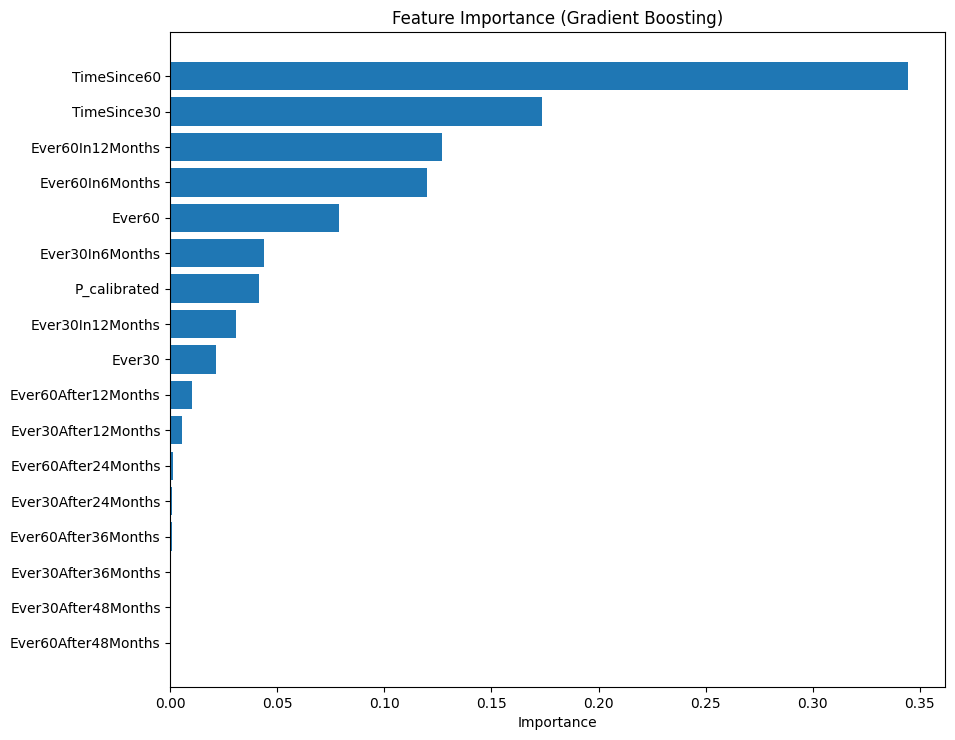

In [101]:

import matplotlib.pyplot as plt
# Assuming rfr_tune is your trained RandomForestClassifier
feature_importances = bgc_tuned.feature_importances_


# Assuming rfr_tune is your trained RandomForestClassifier
feature_importances = bgc_tuned.feature_importances_

feature_names = X.columns
    
# Assuming you have a list of feature names called feature_names
# If you used a pandas DataFrame to hold your training data, you can retrieve this as:
# feature_names = Xtrain.columns
sorted_idx = feature_importances.argsort()



# Creating a dictionary of feature importances
importance_dict = dict(zip(feature_names, feature_importances))

















    
# Assuming you have a list of feature names called feature_names
# If you used a pandas DataFrame to hold your training data, you can retrieve this as:
# feature_names = Xtrain.columns
sorted_idx = feature_importances.argsort()



# Creating a dictionary of feature importances
importance_dict = dict(zip(feature_names, feature_importances))

# Sorting the dictionary by importances
sorted_importances = {k: v for k, v in sorted(importance_dict.items(), key=lambda item: item[1], reverse=False)}

sorted_importances_bgc = sorted_importances 

# Plotting
plt.figure(figsize=(10, len(feature_names)/2))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Importance')
plt.title('Feature Importance (Gradient Boosting)')
plt.show()




In [102]:
from sklearn.ensemble import RandomForestClassifier

# Best parameters
best_params = {'bootstrap': True,'criterion': 'gini','max_depth': 10,'max_features': 10,'min_samples_leaf': 5,'min_samples_split': 7,'n_estimators': 5}

# Create tuned RFC model using best parameters
rfr_tune = RandomForestClassifier(**best_params)
rfr_tune.fit(Xtrain, Y)


RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=5,
                       min_samples_split=7, n_estimators=5)

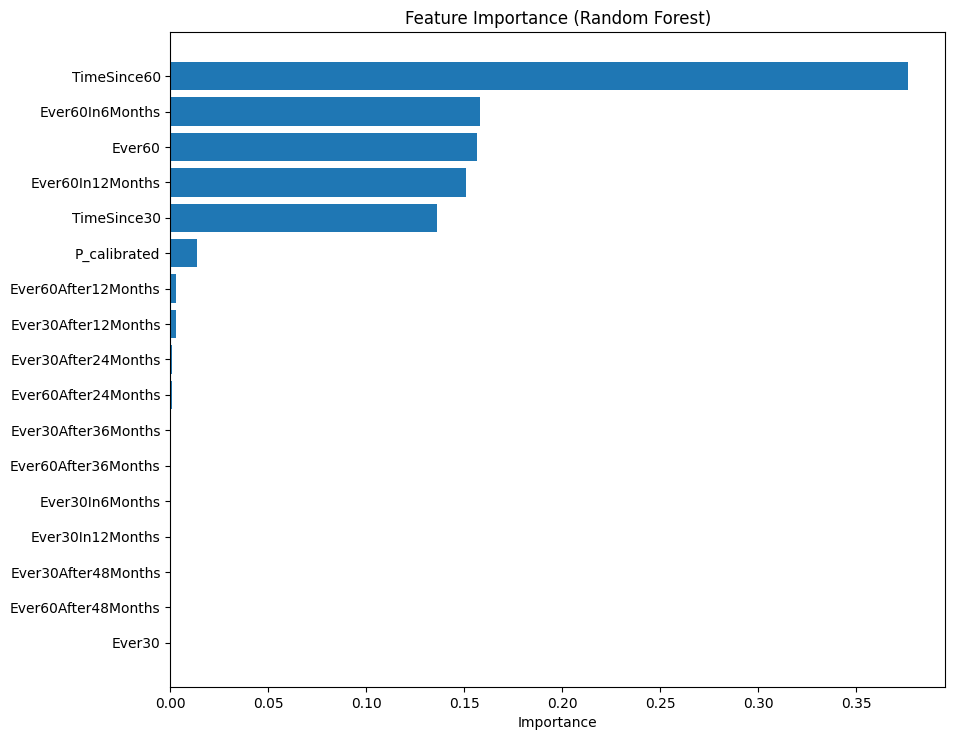

In [103]:

# Assuming rfr_tune is your trained RandomForestClassifier
feature_importances = rfr_tune.feature_importances_
    
# Assuming you have a list of feature names called feature_names
# If you used a pandas DataFrame to hold your training data, you can retrieve this as:
# feature_names = Xtrain.columns
sorted_idx = feature_importances.argsort()



# Creating a dictionary of feature importances
importance_dict = dict(zip(feature_names, feature_importances))

# Sorting the dictionary by importances
sorted_importances = {k: v for k, v in sorted(importance_dict.items(), key=lambda item: item[1], reverse=False)}

sorted_importances_rfs = sorted_importances 

# Plotting
plt.figure(figsize=(10, len(feature_names)/2))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.show()




In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Assuming you have your data loaded in Xtrain and Ytrain

# Hyperparameters you've determined
best_params = {'C': 0.001, 'max_iter': 1000000, 'penalty': 'l2', 'solver': 'lbfgs'}

# Create and fit the Logistic Regression model using the best parameters
lr_tuned = LogisticRegression(**best_params)
lr_tuned.fit(Xtrain, Y)

# Cross-validated score (assuming 5-fold cross validation for example)
#CVS_LR_Tuned = cross_val_score(lr_tuned, Xtrain, Ytrain, cv=5)
#print("Cross-validated score for tuned Logistic Regression:", CVS_LR_Tuned.mean())


LogisticRegression(C=0.001, max_iter=1000000)

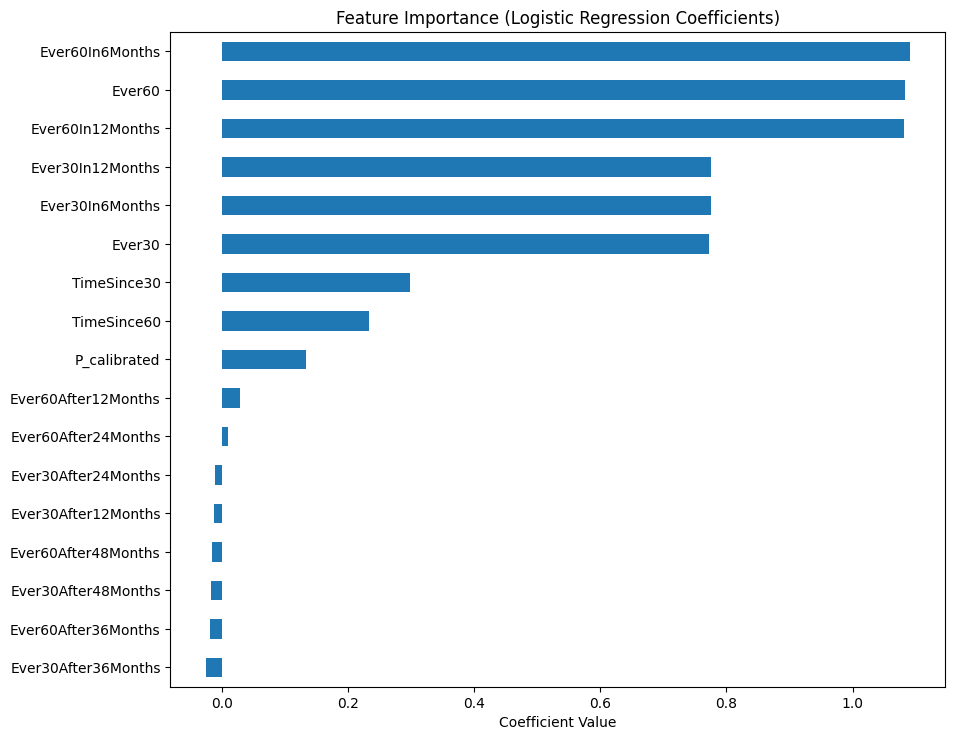

In [105]:
import matplotlib.pyplot as plt

# Retrieve the coefficients from the trained model
coefficients = lr_tuned.coef_[0]

# Assuming X is a pandas DataFrame, retrieve the feature names
#feature_names = test.drop(columns='Ever90').columns

feature_importance = pd.Series(coefficients, index=feature_names).sort_values()

# Plotting
plt.figure(figsize=(10, len(feature_names)/2))
feature_importance.plot(kind='barh')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.show()




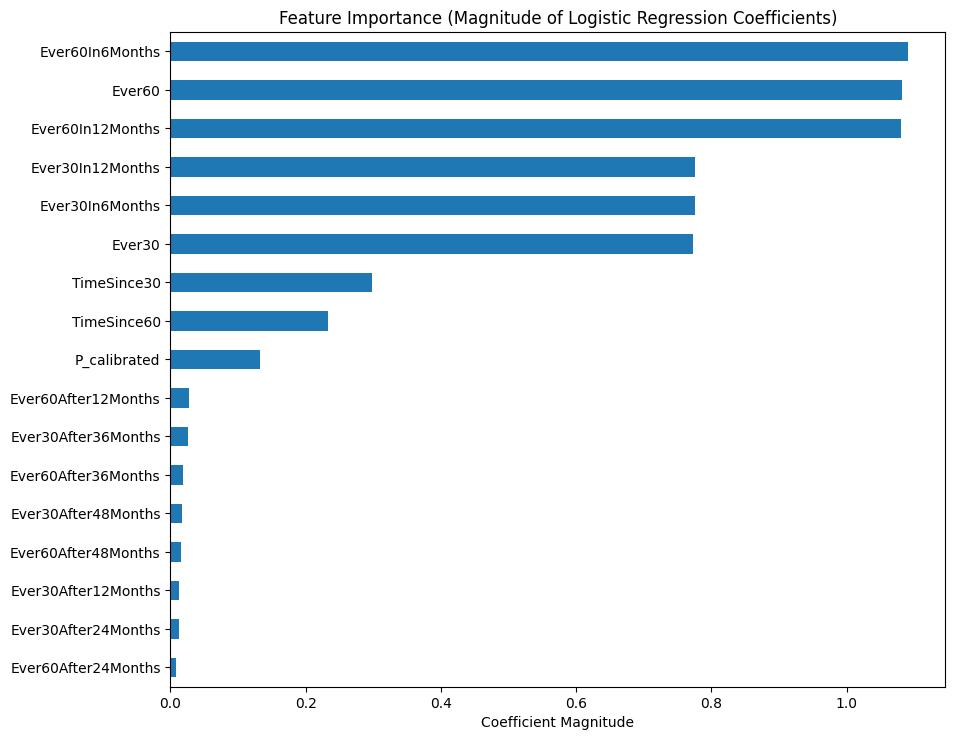

In [106]:
import matplotlib.pyplot as plt
import pandas as pd

# Retrieve the coefficients from the trained model
coefficients = lr_tuned.coef_[0]

# Assuming X is a pandas DataFrame, retrieve the feature names
#feature_names = test.drop(columns='Ever90').columns

# Compute the absolute values of the coefficients to get the magnitude of importance
feature_magnitude = pd.Series(abs(coefficients), index=feature_names)

# Sort by magnitude
sorted_features = feature_magnitude.sort_values(ascending=True)

# Creating a dictionary of feature importances
importance_dict = dict(zip(feature_names, feature_importances))

# Sorting the dictionary by importances
sorted_importances = {k: v for k, v in sorted(importance_dict.items(), key=lambda item: item[1], reverse=False)}

sorted_importances_lg = sorted_importances 

# Plotting
plt.figure(figsize=(10, len(feature_names)/2))
sorted_features.plot(kind='barh')
plt.title('Feature Importance (Magnitude of Logistic Regression Coefficients)')
plt.xlabel('Coefficient Magnitude')
plt.show()




In [107]:

def Normalize_dictionaries(sorted_importances_lg):
    # Calculate the total sum of all feature importances
    total_importance = sum(sorted_importances_lg.values())

    # Normalize each feature's importance by dividing it by the total importance
    return {k: v/total_importance for k, v in sorted_importances_lg.items()}


# Convert DataFrame to dictionary
sorted_importances_Anova = dict(zip(ANOVA_F_table['Numerical_Feature'], ANOVA_F_table['F-Score']))

##3sorted_importances_dct = Normalize_dictionaries(sorted_importances_dct)
sorted_importances_bgc = Normalize_dictionaries(sorted_importances_bgc)
sorted_importances_rfs = Normalize_dictionaries(sorted_importances_rfs)
sorted_importances_lg = Normalize_dictionaries(sorted_importances_lg)
sorted_importances_Anova = Normalize_dictionaries(sorted_importances_Anova)

# Drop 'Age' from all dictionaries

#sorted_importances_dct.pop('AccountNumber', None)
sorted_importances_bgc.pop('AccountNumber', None)
sorted_importances_rfs.pop('AccountNumber', None)
sorted_importances_lg.pop('AccountNumber', None)
sorted_importances_Anova.pop('AccountNumber', None)

# Drop 'Age' from all dictionaries
for i in ['AccountNumber','degenerate_application_id','Gender']:
    

    #sorted_importances_dct.pop(i, None)
    sorted_importances_bgc.pop(i, None)
    sorted_importances_rfs.pop(i, None)
    sorted_importances_lg.pop(i, None)
    sorted_importances_Anova.pop(i, None)



In [108]:
import plotly.graph_objects as go

# ... Your data for sorted_importances_dct, sorted_importances_bgc, etc. ...

# Combining dictionaries
combined_dict = {
    #'DCT': sorted_importances_dct,
    'BGC': sorted_importances_bgc,
    'RFS': sorted_importances_rfs,
    'LG': sorted_importances_lg,
    'ANOVA': sorted_importances_Anova
}

# Calculate cumulative importance for each feature
cumulative_importance = {}
for feature in sorted_importances_bgc.keys():
    cumulative_importance[feature] = sum(d[feature] for d in combined_dict.values())

# Sort features by cumulative importance
sorted_features = sorted(cumulative_importance, key=cumulative_importance.get, reverse=True)

# Plotting the stacked bar chart:
fig = go.Figure()

for method, importances in combined_dict.items():
    values = [importances.get(feature, 0) for feature in sorted_features]
    fig.add_trace(go.Bar(
        x=sorted_features,
        y=values,
        name=method
    ))

fig.update_layout(
    title="Feature Importances by Method",
    barmode='stack',
    xaxis_title="Features",
    yaxis_title="Importance",
    xaxis={'categoryorder':'total descending', 'tickangle': 45}, # Adjust tick angle for better readability
    width=1800,  # Adjust width
    height=800   # Adjust height
)
fig.show()


<Axes: >

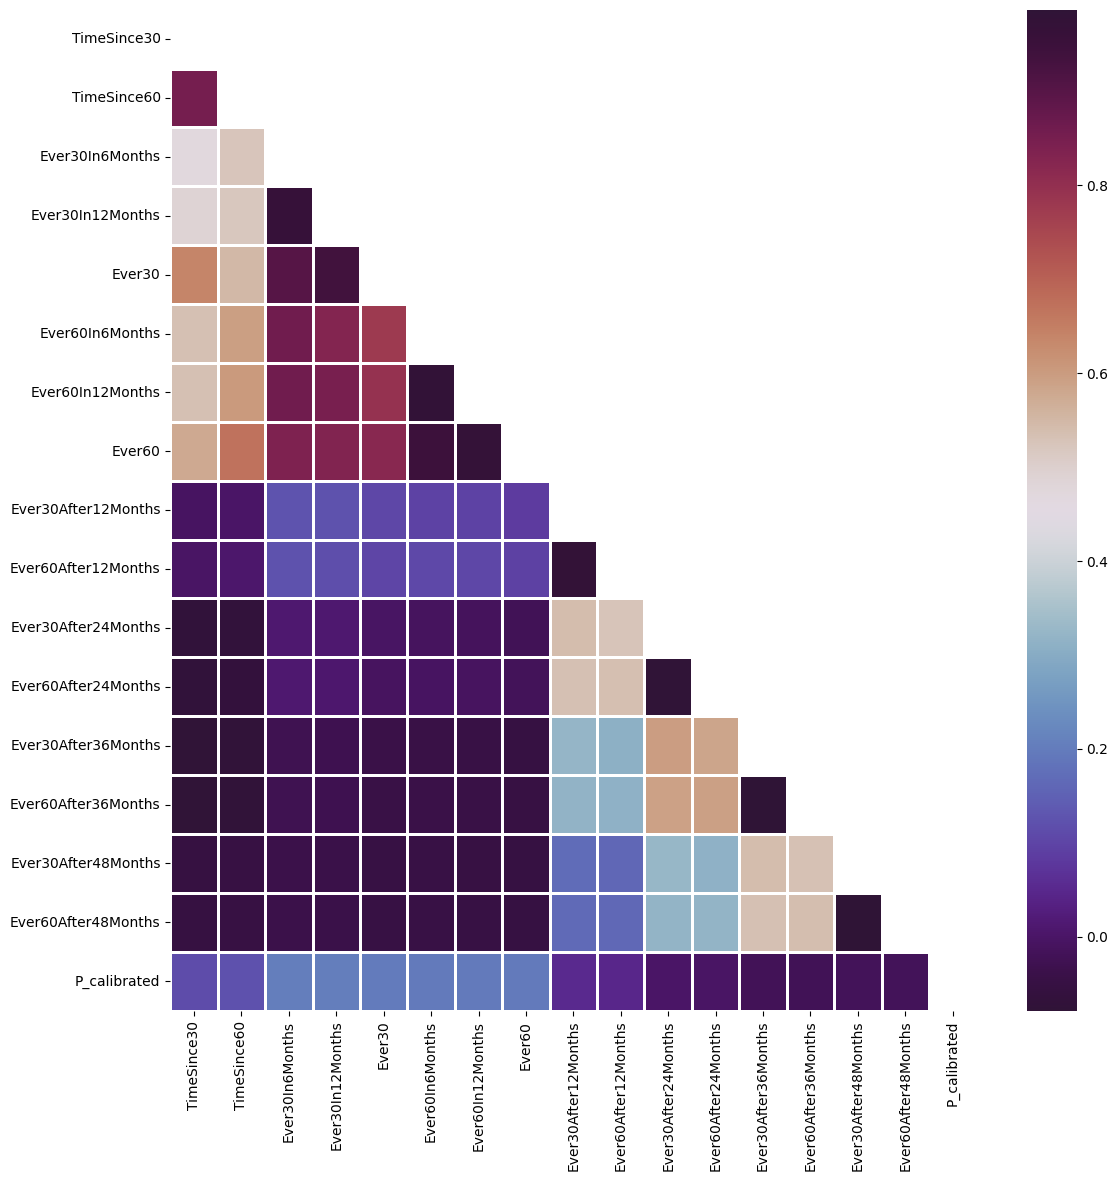

In [40]:
# calculate pair-wise correlations between them
corrmat = X[X.columns].corr()
mask = np.zeros_like(corrmat, dtype=bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(13,13))
sns.heatmap(corrmat, cmap='twilight_shifted', cbar=True, linewidths=1, yticklabels=1  , mask=mask)

In [41]:

correlation_matrix = X[X.columns].corr()

# Identify features that have a correlation greater than 0.8 with another feature
highly_correlated_features = set()

for col in correlation_matrix.columns:
    for idx in correlation_matrix.index:
        # We check if the value is greater than 0.8 and less than 1 
        # because a feature always has a correlation of 1 with itself
        if (correlation_matrix[col][idx] > 0.85 ) and correlation_matrix[col][idx] < 1:  # or correlation_matrix[col][idx] < -0.85
            highly_correlated_features.add(col)
            highly_correlated_features.add(idx)

print(list(highly_correlated_features))


['Ever30After48Months', 'Ever30In6Months', 'Ever60After48Months', 'TimeSince30', 'Ever60After12Months', 'Ever60', 'Ever30After36Months', 'Ever60After24Months', 'Ever30After24Months', 'Ever60After36Months', 'Ever60In12Months', 'TimeSince60', 'Ever60In6Months', 'Ever30In12Months', 'Ever30', 'Ever30After12Months']


In [42]:
plt.figure(figsize=(12,12))
mask = np.zeros_like(corrmat, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corrmat[mask] = np.nan
(corrmat
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .format("{:.2f}"))


,TimeSince30,TimeSince60,Ever30In6Months,Ever30In12Months,Ever30,Ever60In6Months,Ever60In12Months,Ever60,Ever30After12Months,Ever60After12Months,Ever30After24Months,Ever60After24Months,Ever30After36Months,Ever60After36Months,Ever30After48Months,Ever60After48Months,P_calibrated
TimeSince30,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
TimeSince60,0.85,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Ever30In6Months,0.47,0.52,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Ever30In12Months,0.49,0.52,0.96,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Ever30,0.64,0.55,0.90,0.94,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Ever60In6Months,0.53,0.59,0.86,0.83,0.78,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Ever60In12Months,0.53,0.60,0.86,0.85,0.79,0.98,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Ever60,0.58,0.67,0.84,0.83,0.82,0.95,0.97,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Ever30After12Months,-0.01,-0.00,0.12,0.12,0.10,0.10,0.09,0.08,nan,nan,nan,nan,nan,nan,nan,nan,nan
Ever60After12Months,-0.00,0.01,0.12,0.12,0.10,0.11,0.10,0.09,0.97,nan,nan,nan,nan,nan,nan,nan,nan


<Figure size 1200x1200 with 0 Axes>

toKeep

In [ ]:
toKeep 

In [110]:
toKeep = toKeep[['TimeSince30' , 'Ever30In6Months' ,'TimeSince60' , 'Ever60In6Months' ,'P_calibrated' ,'Ever60After12Months']]

In [111]:
toKeep

,TimeSince30,Ever30In6Months,TimeSince60,Ever60In6Months,P_calibrated,Ever60After12Months
3,0.0,0,0.0,0,0.073110,0
4,0.0,0,0.0,0,0.073110,0
5,0.0,0,0.0,0,0.073110,0
6,0.0,0,0.0,0,0.073110,0
7,0.0,0,0.0,0,0.073110,0
...,...,...,...,...,...,...
189418,0.0,0,0.0,0,0.025444,-1
189422,0.0,0,0.0,0,0.024504,-1
189426,0.0,0,0.0,0,0.051579,-1
189430,0.0,0,0.0,0,0.038157,-1
